In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('https://raw.githubusercontent.com/MATF-istrazivanje-podataka-1/2023_Data_Mining_Chess_Dataset/main/data/games.csv')

# Opste informacije o skupu

In [11]:
data.shape

(19108, 17)

In [13]:
data.head()

,Unnamed: 0,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5


In [17]:
data.drop(columns='Unnamed: 0',inplace=True)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19108 entries, 0 to 19107
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              19108 non-null  object 
 1   rated           19108 non-null  bool   
 2   created_at      19108 non-null  float64
 3   last_move_at    19108 non-null  float64
 4   turns           19108 non-null  int64  
 5   victory_status  19108 non-null  object 
 6   winner          19108 non-null  object 
 7   increment_code  19108 non-null  object 
 8   white_id        19108 non-null  object 
 9   white_rating    19108 non-null  int64  
 10  black_id        19108 non-null  object 
 11  black_rating    19108 non-null  int64  
 12  moves           19108 non-null  object 
 13  opening_eco     19108 non-null  object 
 14  opening_name    19108 non-null  object 
 15  opening_ply     19108 non-null  int64  
dtypes: bool(1), float64(2), int64(4), object(9)
memory usage: 2.2+ MB


In [31]:
data.victory_status.unique()

array(['outoftime', 'resign', 'mate'], dtype=object)

In [20]:
data.winner.unique()

array(['white', 'black'], dtype=object)

In [23]:
data.increment_code[:10]

0     15+2
1     5+10
2     5+10
3     20+0
4     30+3
5     10+0
6    15+30
7     15+0
8     10+0
9    20+60
Name: increment_code, dtype: object

In [27]:
data.drop(columns=['created_at', 'last_move_at'], inplace=True)# brisemo dve kolone koje nam ne trebaju

In [28]:
data.describe()

,turns,white_rating,black_rating,opening_ply
count,19108.000000,19108.000000,19108.000000,19108.000000
mean,59.188664,1593.702167,1586.227863,4.805055
std,32.310010,289.949727,290.146458,2.782938
min,1.000000,784.000000,789.000000,1.000000
25%,37.000000,1395.000000,1389.000000,3.000000
50%,54.000000,1564.000000,1560.000000,4.000000
75%,77.000000,1788.000000,1781.000000,6.000000
max,349.000000,2700.000000,2723.000000,28.000000


# Neke zanimljive statistike skupa

In [32]:
no_wWins=data.loc[data.winner=='white'].shape[0]
no_bWins = data.loc[data.winner=='black'].shape[0]
print(no_wWins, no_bWins)
#broj pobeda belih i crnih 


10001 9107


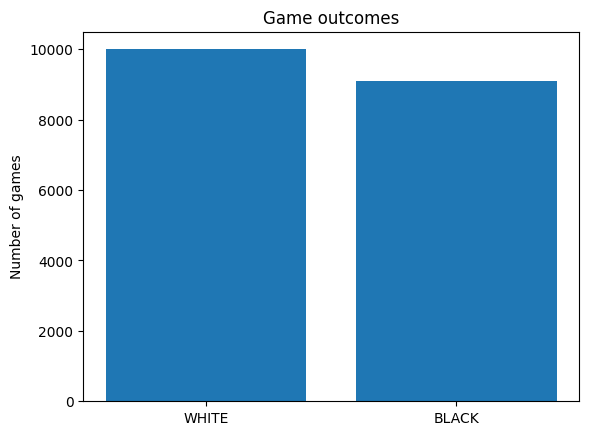

In [33]:
plt.bar(['WHITE', 'BLACK'], [no_wWins, no_bWins])
plt.ylabel('Number of games')
plt.title('Game outcomes')
plt.show()

In [34]:
openings = data.opening_name.to_numpy()
unique, counts = np.unique(openings, return_counts=True)
op_played = dict(zip(unique,counts))
op_sorted=sorted(op_played.items(),key=lambda x:x[1],reverse=True)
# max(op_played.values())

most_common_tuple=list()
for i in range(7):
  most_common_tuple.append(op_sorted[i])
most_common_tuple
m_common = map(lambda x: x[0], most_common_tuple)
m_common_app = map(lambda x: x[1], most_common_tuple)
mc_list=list(m_common)
mc_list_app=list(m_common_app)


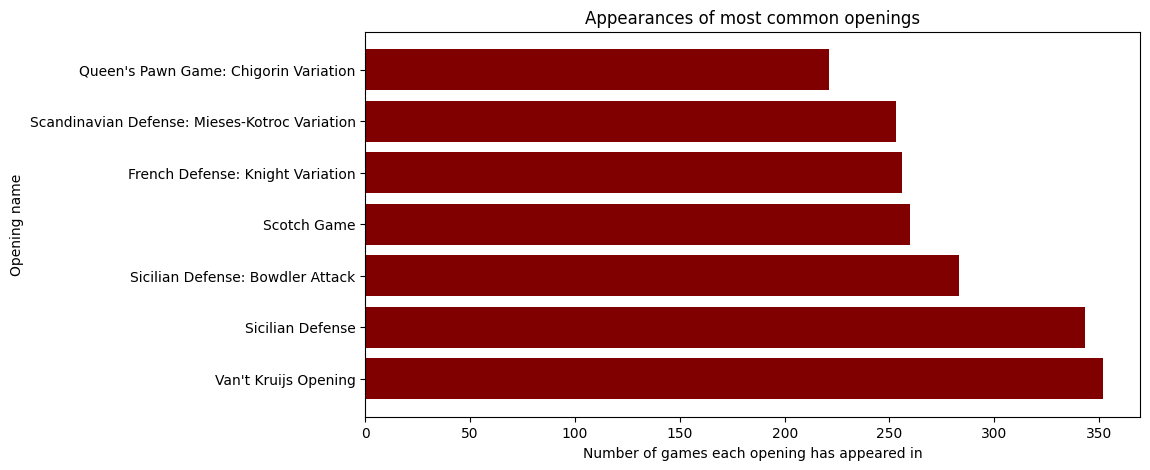

In [35]:
plt.figure(figsize=(10,5))
plt.barh(mc_list,mc_list_app,color='maroon')
plt.ylabel('Opening name')
plt.xlabel('Number of games each opening has appeared in')
plt.title('Appearances of most common openings')
plt.show()

In [36]:
# Zelimo da vidimo odredjeni broj poteza kako izgleda sicilijanka. Uzeli smo rejtinge vece od 2200 jer zelimo da vidimo dobre igrace kako igraju
sicilian=data.loc[(data.opening_name==op_sorted[1][0]) & (data.black_rating>=2000) & ((data.white_rating>=2000))]
sicilian.head()
sicilian_ply=round(sicilian.opening_ply.mean()) # koliko u proseku traje otvaranje
sicilian_ply
sicilian.iloc[1].moves
def extract_moves(potezi):
  no_spaces = 0
  j = 0
  for i in potezi:
    if i==' ':
      no_spaces+=1
    j+=1
    if no_spaces==2*sicilian_ply:
      return potezi[0:j-1]
sicilian

,id,rated,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
2974,Lwbb2x5M,True,122,resign,black,7+4,meccanoidg15,2176,meoc,2027,e4 c5 Be2 e6 f4 Qc7 d3 Nc6 Nf3 Be7 O-O Nf6 Kh1...,B20,Sicilian Defense,2
2981,C78HIxXU,True,93,resign,white,7+4,meccanoidg15,2129,wadim001,2088,e4 c5 Nf3 d6 Bc4 e6 Nc3 a6 d3 h6 Bf4 g5 Be3 Bg...,B50,Sicilian Defense,4
5188,kuw0jpH8,True,82,resign,black,30+10,bishopson,2181,vanraj,2153,e4 c5 Nf3 d6 Bd3 Nf6 c3 a6 Bc2 g6 O-O Bg7 Re1 ...,B50,Sicilian Defense,4
7733,XnkPzt9n,True,118,mate,black,20+0,minhad,2017,tupson,2232,e4 c5 d3 Nc6 Nf3 e5 Nbd2 Nf6 g3 Be7 Bg2 d6 O-O...,B20,Sicilian Defense,2
12896,M7DQMNCz,True,110,mate,black,10+0,mursi_99,2025,mmichael,2194,e4 c5 Nf3 d6 Bc4 Nf6 Nc3 Nc6 d3 e6 a3 Be7 g4 N...,B50,Sicilian Defense,4
18105,eNbs0Oew,True,140,mate,black,180+5,queen-of-hearts,2069,chessmageddon,2223,e4 c5 Nf3 d6 Nc3 Nf6 g3 Nc6 Bg2 e6 d3 Be7 O-O ...,B50,Sicilian Defense,4


In [ ]:
p=extract_moves(sicilian.iloc[2].moves)
p

'e4 c5 Nf3 d6 Bd3 Nf6'

In [ ]:
from google.colab import files
from IPython.display import Image
uploaded = files.upload()

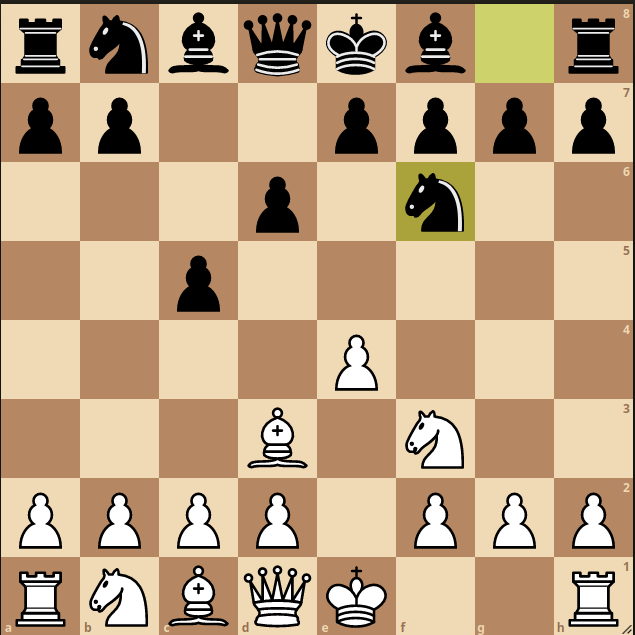

In [ ]:
Image('sahic.png')

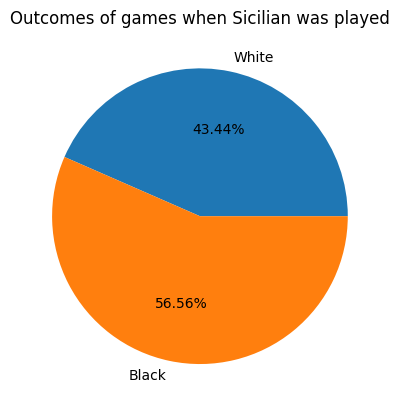

In [38]:
sicilian=data.loc[data.opening_name==op_sorted[1][0]]
sic_w=len(sicilian.loc[sicilian.winner=='white'])
sic_b=len(sicilian.loc[sicilian.winner=='black'])
l = list([sic_w,sic_b])
plt.pie(l,labels=['White', 'Black'],autopct='%.2f%%')
plt.title('Outcomes of games when Sicilian was played')
plt.show()

In [39]:
niz = sicilian.white_rating.to_numpy()
def rasporedi(niz):
  A=np.array([0,0,0,0])
  for i in niz:
    if i <=1300:
      A[0]+=1
    elif i<=1700:
      A[1]+=1
    elif i<=2100:
      A[2]+=1
    else: A[3]+=1
  return A
Beli = rasporedi(niz)
niz = sicilian.black_rating.to_numpy()
Crni = rasporedi(niz)

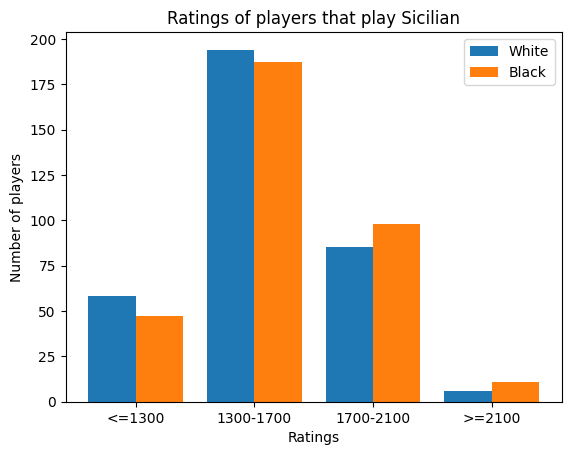

In [40]:
X=['<=1300','1300-1700','1700-2100','>=2100']
X_axis=np.arange(len(X))

plt.bar(X_axis-0.2,Beli,0.4,label='White')
plt.bar(X_axis+0.2,Crni,0.4,label='Black')

plt.xticks(X_axis, X)
plt.xlabel('Ratings')
plt.ylabel('Number of players')
plt.title('Ratings of players that play Sicilian')
plt.legend()
plt.show()